## Check email spam using Multinomial Naive Bayes

In [1]:
## packages
import numpy as np
from scipy.sparse import coo_matrix # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score # for evaluating results

# data path and file name
path = '../data/Prac1/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'

In [2]:
nwords = 2500

def read_data(data_fn, label_fn):
    ## read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]

    ## read data_fn
    
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype = int)

    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo
    #_matrix.html
    # for more information about coo_matrix function
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),\
        shape=(len(label), nwords))
    return (data, label)

In [3]:
(train_data, train_label) = read_data(train_data_fn, train_label_fn)
(test_data, test_label) = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)

clf.score(test_data, test_label)

0.9807692307692307

In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_label, y_pred)
cm

array([[126,   4],
       [  1, 129]])

Text(95.72222222222221, 0.5, 'Truth')

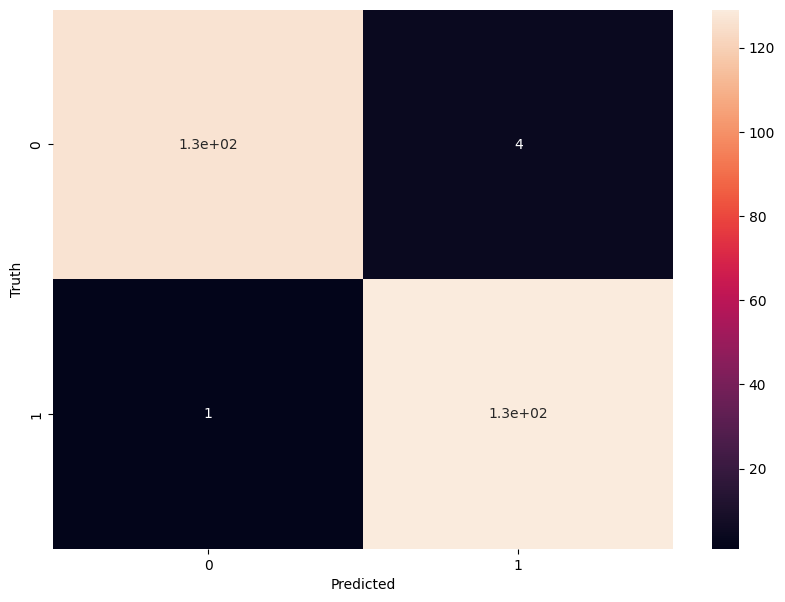

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

